In [1]:
""" Make PLC test cases and then run these with quarantine cycles """
import sys 
sys.path.append('..')

import pymongo 
import matplotlib.pyplot as plt 
import numpy as np 
import networkx as nx 

import quarantines as Q 
import quarantines_mongo as qm 


In [10]:
# Primary test 1: Find a (m,tau, gamma) setting that has ~80% population infected no quarantine 
N = 10 ** 4 
m = 5 

tau = 1.0
gamma = 1.0 

G = nx.powerlaw_cluster_graph(N, m, p=0.25)

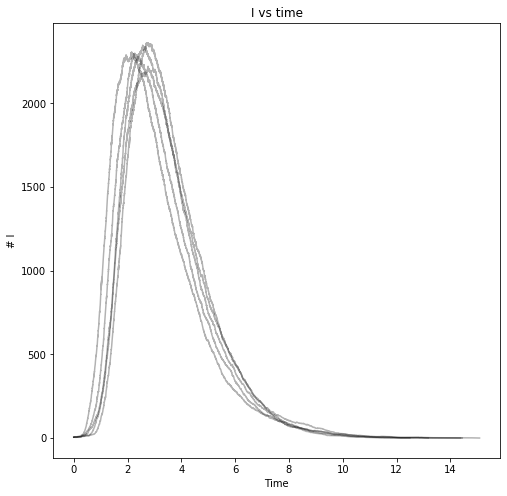

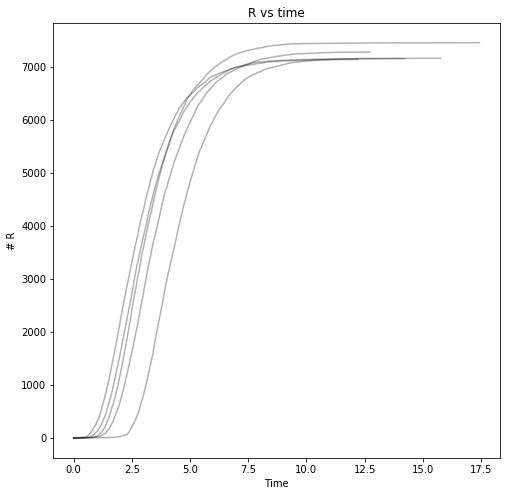

In [5]:
Q.plot_vanilla_run(G, tau, gamma, 0.0005, float('inf'))

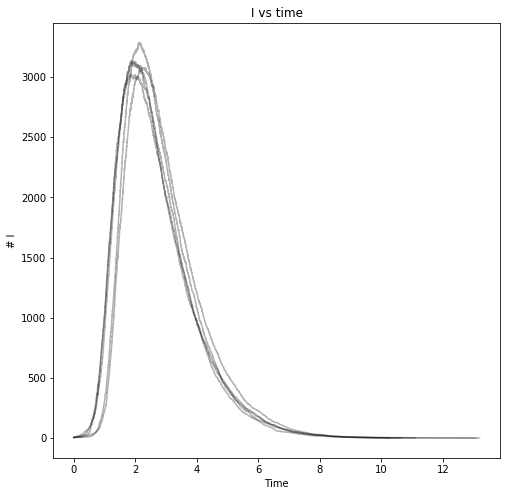

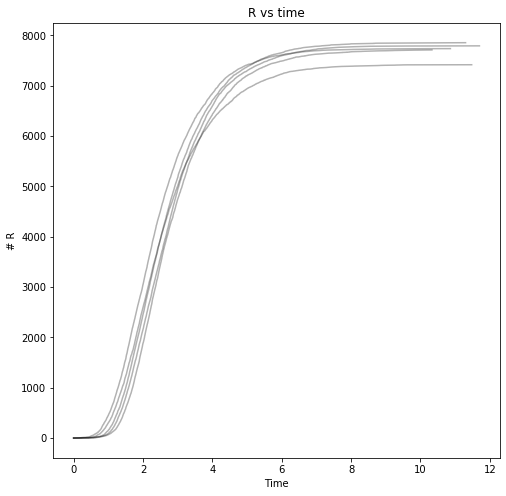

In [13]:
G = nx.powerlaw_cluster_graph(N, 2, p=0.05)
Q.plot_vanilla_run(G, tau, gamma, 0.0005, float('inf'))

In [58]:
# Want 2 test cases: low-degree/high-degree (p doesn't matter I guess, so set p=0.25)
G1 = nx.powerlaw_cluster_graph(N, m=3, p=0.25)
# R0 = 0.5, 1.0, 1.5 
# FIX tau at 0.1
# then try r0 of (0.2, 0.5, 1.0, 2.0, 5.0)
tau = 0.1
Q.quarantines_by_time(G1, tau, tau / 5, 0.0005, 0.0, float('inf'), num_iter=5)[1].get_final_R()
#Q.plot_vanilla_run(G1, tau, tau / 5, 0.005, float('inf'))

9986.0

In [59]:
for r0 in [0.1,0.2, 0.5,1.0, 2.0,5.0, 10.0]:
    print(r0, Q.quarantines_by_time(G1, tau, tau / r0, 0.001, 0.0, float('inf'), num_iter=5)[1].get_final_R())

0.1 91.0
0.2 3169.0
0.5 7428.0
1.0 9253.0
2.0 9791.0
5.0 9975.0
10.0 9998.0


In [60]:
# So two setups: nx.powerlaw_cluster_graph
# m's: 3, 5 
# tau = 0.1 
# r0: 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0 
# So a total of 14 graph/epidemic pairs 
# And then can try two-quarantine strategy over this? 

In [69]:
m = 3 
tau = 0.1 
r0 = 0.2
gamma = tau / r0

G = nx.powerlaw_cluster_graph(N, m, 0.4)



In [72]:
qgrid = Q.get_quarantine_grid_data_props(G, tau, gamma, 0.001, float('inf'), [_ / 20 for _ in range(8)], [_/20 for _ in range(8)])

Quarantine @ props p=0.0,0.0
Quarantine @ props p=0.0,0.05
Quarantine @ props p=0.0,0.1
Quarantine @ props p=0.0,0.15
Quarantine @ props p=0.0,0.2
Quarantine @ props p=0.0,0.25
Quarantine @ props p=0.0,0.3
Quarantine @ props p=0.0,0.35
Quarantine @ props p=0.05,0.0
Quarantine @ props p=0.05,0.05
Quarantine @ props p=0.05,0.1
Quarantine @ props p=0.05,0.15
Quarantine @ props p=0.05,0.2
Quarantine @ props p=0.05,0.25
Quarantine @ props p=0.05,0.3
Quarantine @ props p=0.05,0.35
Quarantine @ props p=0.1,0.0
Quarantine @ props p=0.1,0.05
Quarantine @ props p=0.1,0.1
Quarantine @ props p=0.1,0.15
Quarantine @ props p=0.1,0.2
Quarantine @ props p=0.1,0.25
Quarantine @ props p=0.1,0.3
Quarantine @ props p=0.1,0.35
Quarantine @ props p=0.15,0.0
Quarantine @ props p=0.15,0.05
Quarantine @ props p=0.15,0.1
Quarantine @ props p=0.15,0.15
Quarantine @ props p=0.15,0.2
Quarantine @ props p=0.15,0.25
Quarantine @ props p=0.15,0.3
Quarantine @ props p=0.15,0.35
Quarantine @ props p=0.2,0.0
Quarantine 

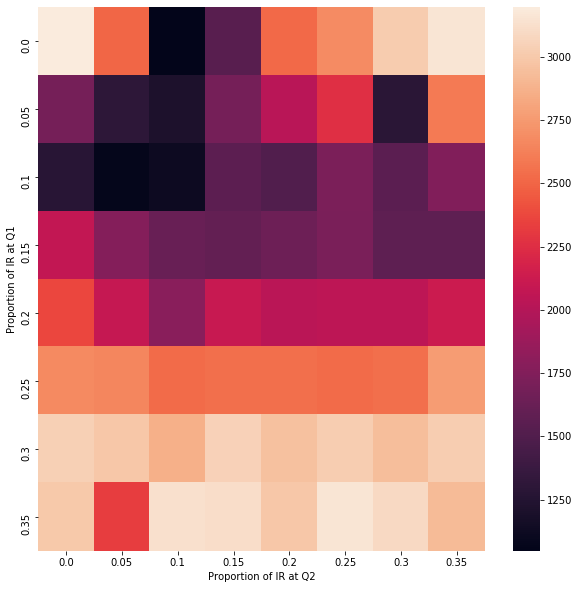

In [77]:
Q.heatmapify(*Q.process_into_grid(qgrid, func=Q.AggregateTuple.get_final_R), 'prop')

In [75]:
Q.hea

[[3196.0,
  2499.6666666666665,
  1048.0,
  1540.3333333333333,
  2519.6666666666665,
  2681.6666666666665,
  3018.3333333333335,
  3157.0],
 [1694.0,
  1304.3333333333333,
  1208.6666666666667,
  1693.0,
  2027.3333333333333,
  2264.0,
  1283.3333333333333,
  2598.0],
 [1281.6666666666667,
  1071.6666666666667,
  1123.3333333333333,
  1561.0,
  1508.0,
  1725.6666666666667,
  1554.3333333333333,
  1751.0],
 [2075.3333333333335,
  1762.3333333333333,
  1625.0,
  1598.3333333333333,
  1649.6666666666667,
  1714.6666666666667,
  1575.0,
  1568.6666666666667],
 [2370.6666666666665,
  2089.0,
  1792.0,
  2102.0,
  2030.6666666666667,
  2047.6666666666667,
  2054.0,
  2123.3333333333335],
 [2671.0,
  2651.3333333333335,
  2533.0,
  2546.3333333333335,
  2547.3333333333335,
  2526.6666666666665,
  2545.0,
  2766.0],
 [3039.0,
  2993.6666666666665,
  2867.6666666666665,
  3053.0,
  2958.0,
  3026.3333333333335,
  2938.0,
  3024.0],
 [3002.0,
  2329.6666666666665,
  3132.6666666666665,
  3120.

In [80]:
lc = pymongo.MongoClient('localhost', 27017)
plc_qtine = list(lc['quarantine20']['plc_qtines'].find())

In [83]:
plc_qtine[3]

{'_id': ObjectId('5f29c9df7afbcce4735fc526'),
 'graph_id': ObjectId('5f29c9d57afbcce4735fc521'),
 'epidemic_id': ObjectId('5f29c9d57afbcce4735fc522'),
 'num_runs': 5,
 'num_qtines': 2,
 'qtine_strat': 'prop',
 'qtine_data': [0.0, 0.15],
 'final_Rs': [7967.0, 7691.0, 7833.0, 8012.0, 7691.0],
 'max_Is': [2396.0, 2192.0, 2236.0, 2438.0, 2215.0]}